In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Conv1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 
import csv
import time as t
plt.rcParams.update({'font.size': 22})

In [3]:
file_path = "../Data_acquisition/Final DB/commercial/"

In [4]:
def plot_series(time, series, format="-", start = 0, end= None):
  """
  Plot time series data in time order
  """
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

In [5]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [6]:
def percentage_error(actual, prediction):
    """
    Compute the PE in MAPE
    """
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - prediction[j]) / actual[j]
        else:
            res[j] = prediction[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Compute MAPE
    """
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [7]:
def plot_loss_mae(history, percentage = 0.9):
    """
    To better understand the performance of hyperparameters, 
    observe the plot for convergence
    """
    mae=history.history["mae"]
    loss=history.history["loss"]

    epochs=range(len(loss)) # Get number of epochs
    zoom_range = int(percentage * len(loss))

    # Plot MAE and Loss

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))

    ax1.plot(epochs, mae, "r", label = "Mae")
    ax1.plot(epochs, loss, "b", label = "Loss")
    ax1.set_title("Mae and loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")
    ax1.legend(loc = "upper right")

    epochs_zoom = epochs[zoom_range:]
    mae_zoom = mae[zoom_range:]
    loss_zoom = loss[zoom_range:]

    # Plot Zoomed MAE and Loss

    ax2.plot(epochs_zoom, mae_zoom, "r", label = "Mae")
    ax2.plot(epochs_zoom, loss_zoom, "b", label = "Loss")
    ax2.set_title("Zoomed mae and loss")
    ax2.set_xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc = "upper right")
    

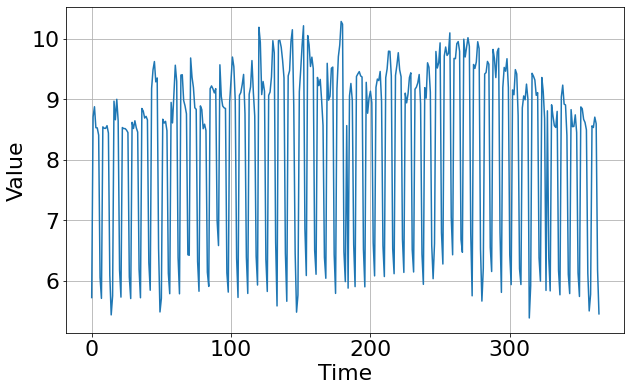

In [8]:
time_step = []
temps = []

with open(file_path + "merged_energy.csv") as csvfile:
  reader = csv.reader(csvfile,delimiter = ',')
  next(reader) #first line
  step = 0
  for row in reader:
    temps.append(float(row[3]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10,6))
plot_series(time,series)

In [9]:
# Normalize data 

In [10]:
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series.reshape(-1, 1))
print(series_scaled)
series_scaled = series_scaled.flatten()
series_scaled

[[0.068841  ]
 [0.67805049]
 [0.71243963]
 [0.64175553]
 [0.64100427]
 [0.61676275]
 [0.13632588]
 [0.06605404]
 [0.6444851 ]
 [0.63974435]
 [0.63940496]
 [0.64853322]
 [0.62359788]
 [0.14456159]
 [0.01040485]
 [0.07425966]
 [0.73135076]
 [0.66845186]
 [0.73749776]
 [0.664378  ]
 [0.16089956]
 [0.07036687]
 [0.64223117]
 [0.63873053]
 [0.63877642]
 [0.63363067]
 [0.62540144]
 [0.13811637]
 [0.065504  ]
 [0.65978111]
 [0.63896462]
 [0.66508693]
 [0.64126632]
 [0.62689554]
 [0.16419686]
 [0.06818105]
 [0.70652562]
 [0.69787057]
 [0.6742778 ]
 [0.68006528]
 [0.66807334]
 [0.18633058]
 [0.09358975]
 [0.77440789]
 [0.83683281]
 [0.8648543 ]
 [0.79635296]
 [0.80945388]
 [0.23476605]
 [0.02032011]
 [0.06619532]
 [0.67029313]
 [0.65723885]
 [0.66314699]
 [0.63163643]
 [0.15074175]
 [0.08182155]
 [0.72694701]
 [0.65782182]
 [0.75195548]
 [0.85248376]
 [0.79796282]
 [0.20367098]
 [0.08151472]
 [0.81910292]
 [0.82035702]
 [0.73333636]
 [0.71499451]
 [0.68852759]
 [0.21341956]
 [0.21129242]
 [0.87

array([0.068841  , 0.67805049, 0.71243963, 0.64175553, 0.64100427,
       0.61676275, 0.13632588, 0.06605404, 0.6444851 , 0.63974435,
       0.63940496, 0.64853322, 0.62359788, 0.14456159, 0.01040485,
       0.07425966, 0.73135076, 0.66845186, 0.73749776, 0.664378  ,
       0.16089956, 0.07036687, 0.64223117, 0.63873053, 0.63877642,
       0.63363067, 0.62540144, 0.13811637, 0.065504  , 0.65978111,
       0.63896462, 0.66508693, 0.64126632, 0.62689554, 0.16419686,
       0.06818105, 0.70652562, 0.69787057, 0.6742778 , 0.68006528,
       0.66807334, 0.18633058, 0.09358975, 0.77440789, 0.83683281,
       0.8648543 , 0.79635296, 0.80945388, 0.23476605, 0.02032011,
       0.06619532, 0.67029313, 0.65723885, 0.66314699, 0.63163643,
       0.15074175, 0.08182155, 0.72694701, 0.65782182, 0.75195548,
       0.85248376, 0.79796282, 0.20367098, 0.08151472, 0.81910292,
       0.82035702, 0.73333636, 0.71499451, 0.68852759, 0.21341956,
       0.21129242, 0.87686447, 0.81177063, 0.777582  , 0.70900

In [11]:
#Train test split 70:30
time_split = int(len(time_step)*0.7)
time_train = time[:time_split]
x_train = series_scaled[:time_split]
time_valid = time[time_split:]
x_valid = series_scaled[time_split:]

#Keep true x_valid for comparison
x_valid_true = series[time_split:]
shuffle_buffer_size = len(x_train)

In [12]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """
    Create windowed dataset, inspired by the Course (ref)
    """
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [13]:
def model_forecast(model, series, window_size):
    """
    Perform forecast on a single point, inspired by the Course (ref)
    """
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

0140 - mae: 0.1144
Epoch 189/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0139 - mae: 0.1166
Epoch 190/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0139 - mae: 0.1151
Epoch 191/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0139 - mae: 0.1127
Epoch 192/400
3/3 [==============================] - 0s 11ms/step - loss: 0.0139 - mae: 0.1171
Epoch 193/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0139 - mae: 0.1157
Epoch 194/400
3/3 [==============================] - 0s 10ms/step - loss: 0.0138 - mae: 0.1137
Epoch 195/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0138 - mae: 0.1168
Epoch 196/400
3/3 [==============================] - 0s 18ms/step - loss: 0.0137 - mae: 0.1136
Epoch 197/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0138 - mae: 0.1125
Epoch 198/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0136 - mae: 0.1131
Epoch 199/400
3/3 [==================

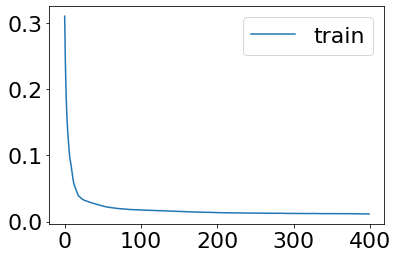

44.40705347061157


In [14]:
#one-layer RNN
start = t.time()
tf.random.set_seed(0)
np.random.seed(0)

window_size = 7
train_set = windowed_dataset(x_train, window_size = window_size, batch_size= 100, shuffle_buffer = shuffle_buffer_size)
model = Sequential([
    SimpleRNN(32, return_sequences=True),
    Dense(32, activation="relu"), 
    Dense(16, activation="relu"),
    Dense(1)
])

optimizer = "adam"
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=400)

# plot history
plt.plot(history.history["loss"], label="train")
plt.legend()
plt.show()

print(t.time()-start)

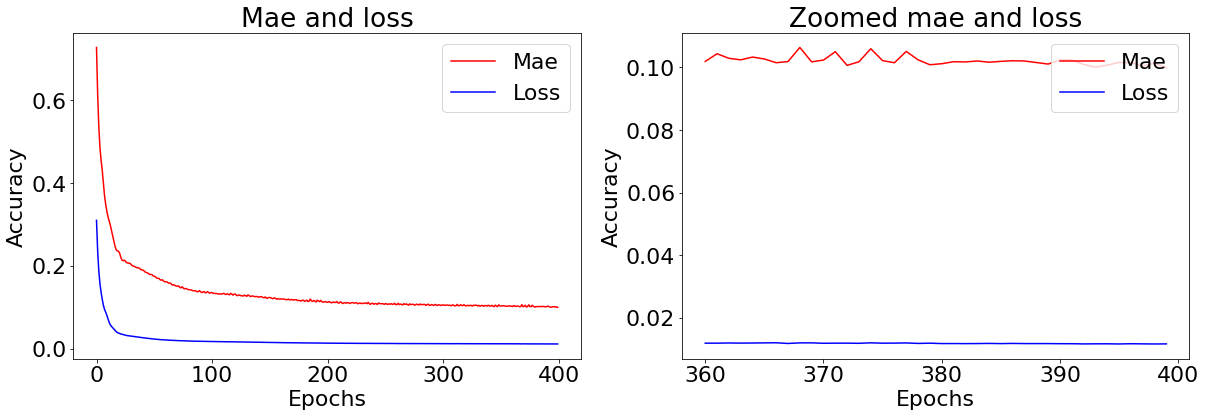

In [15]:
plot_loss_mae(history)

In [16]:
start = t.time()

results = model_forecast(model, series_scaled[..., np.newaxis], window_size)
results = results[time_split - window_size:-1, -1, 0]

print(t.time()-start)

0.36849451065063477


In [17]:
results = scaler.inverse_transform(results[np.newaxis]).reshape(-1,)

0.4029020646401868
4.9239969623825575


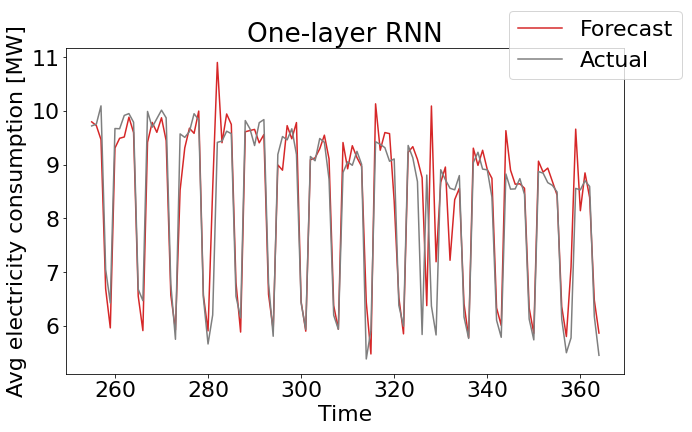

In [18]:
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.plot(time_valid, results, color = "tab:red", label = "Forecast")
ax1.plot(time_valid, x_valid_true, color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("One-layer RNN")
ax1.set_ylabel("Avg electricity consumption [MW]")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

#Calculate MAE and MAPE
print(mean_absolute_error(results,x_valid_true))
print(mean_absolute_percentage_error(results,x_valid_true))

===========================] - 0s 6ms/step - loss: 0.0149 - mae: 0.1195
Epoch 189/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0150 - mae: 0.1228
Epoch 190/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0150 - mae: 0.1185
Epoch 191/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0150 - mae: 0.1219
Epoch 192/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0149 - mae: 0.1207
Epoch 193/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0151 - mae: 0.1203
Epoch 194/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0150 - mae: 0.1213
Epoch 195/400
4/4 [==============================] - 0s 7ms/step - loss: 0.0148 - mae: 0.1195
Epoch 196/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0149 - mae: 0.1211
Epoch 197/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0149 - mae: 0.1200
Epoch 198/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0149 - 

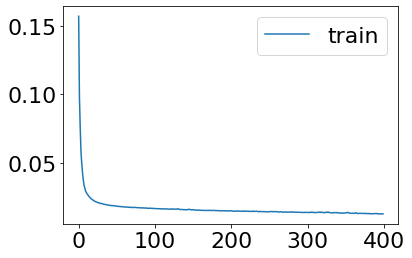

33.589619636535645


In [21]:
# two-layer RNN
start = t.time()

tf.random.set_seed(0)
np.random.seed(0)

window_size = 7
train_set = windowed_dataset(x_train, window_size = window_size, batch_size= 64, shuffle_buffer = shuffle_buffer_size)
model = Sequential([
    SimpleRNN(32, return_sequences=True), 
    SimpleRNN(32, return_sequences=True),
    Dense(32, activation="relu"), 
    Dense(16, activation="relu"),
    Dense(1)
])

optimizer = "adam"
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=400)

# plot history
plt.plot(history.history["loss"], label="train")
plt.legend()
plt.show()

print(t.time()-start)

0.4990248680114746


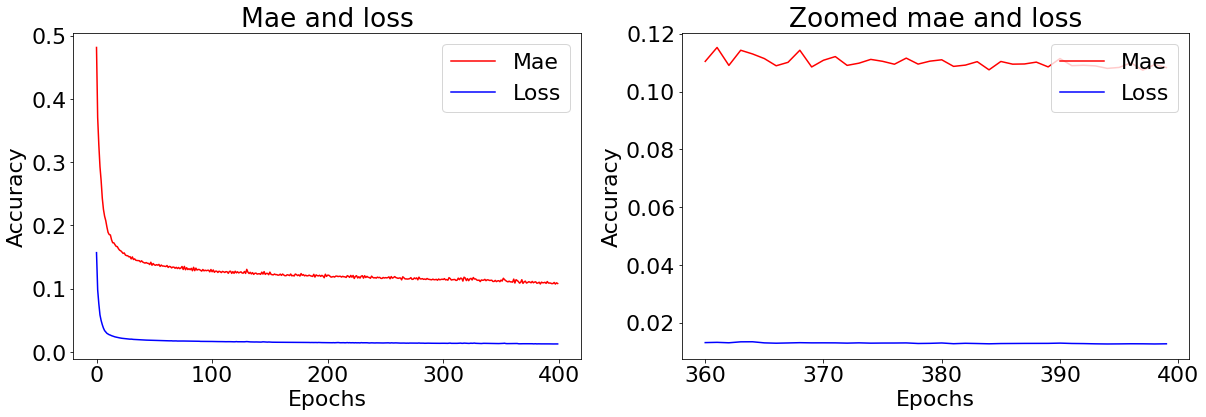

In [22]:
start = t.time()
plot_loss_mae(history)

results = model_forecast(model, series_scaled[..., np.newaxis], window_size)
results = results[time_split - window_size:-1, -1, 0]

print(t.time()-start)

0.40936272905433974
4.949982765478378


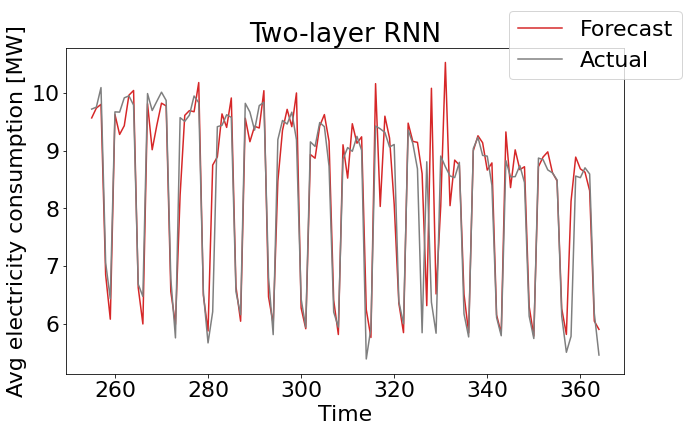

In [23]:
results = scaler.inverse_transform(results[np.newaxis]).reshape(-1,)

fig, ax1 = plt.subplots(figsize = (10,6))
ax1.plot(time_valid, results, color = "tab:red", label = "Forecast")
ax1.plot(time_valid, x_valid_true, color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("Two-layer RNN")
ax1.set_ylabel("Avg electricity consumption [MW]")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

#Calculate MAE and MAPE
print(mean_absolute_error(results,x_valid_true))
print(mean_absolute_percentage_error(results,x_valid_true))

64 - mae: 0.1318
Epoch 190/400
3/3 [==============================] - 0s 10ms/step - loss: 0.0161 - mae: 0.1288
Epoch 191/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0160 - mae: 0.1284
Epoch 192/400
3/3 [==============================] - 0s 10ms/step - loss: 0.0160 - mae: 0.1293
Epoch 193/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0160 - mae: 0.1273
Epoch 194/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0159 - mae: 0.1287
Epoch 195/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0159 - mae: 0.1300
Epoch 196/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0158 - mae: 0.1264
Epoch 197/400
3/3 [==============================] - 0s 20ms/step - loss: 0.0159 - mae: 0.1270
Epoch 198/400
3/3 [==============================] - 0s 9ms/step - loss: 0.0164 - mae: 0.1256
Epoch 199/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0161 - mae: 0.1246
Epoch 200/400
3/3 [=================

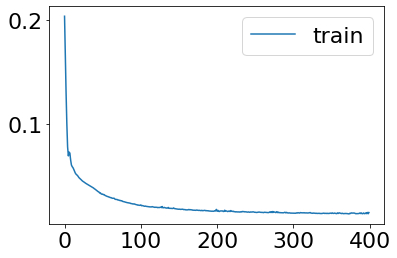

57.55124807357788


In [19]:
#one-layer LSTM
start = t.time()
tf.random.set_seed(0)
np.random.seed(0)

window_size = 7
train_set = windowed_dataset(x_train, window_size = window_size, batch_size= 120, shuffle_buffer = shuffle_buffer_size)
model = Sequential([
    LSTM(64, return_sequences=True),
    Dense(64, activation="relu"), 
    Dense(32, activation="relu"),
    Dense(1)
])

optimizer = "adam"
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=400)

# plot history
plt.plot(history.history["loss"], label="train")
plt.legend()
plt.show()

print(t.time()-start)

0.7618584632873535


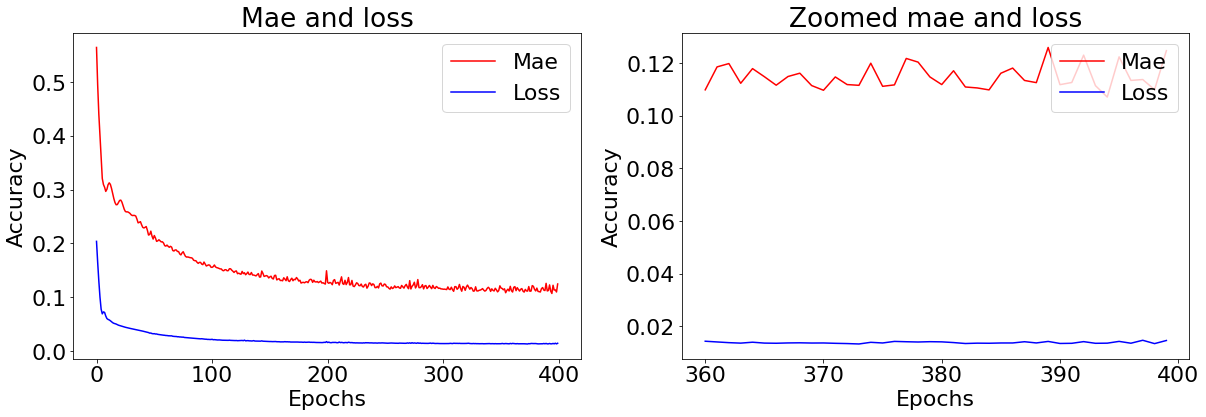

In [20]:
start = t.time()
plot_loss_mae(history)

results = model_forecast(model, series_scaled[..., np.newaxis], window_size)
results = results[time_split - window_size:-1, -1, 0]

print(t.time()-start)

0.3386738718795112
4.2963173528773355


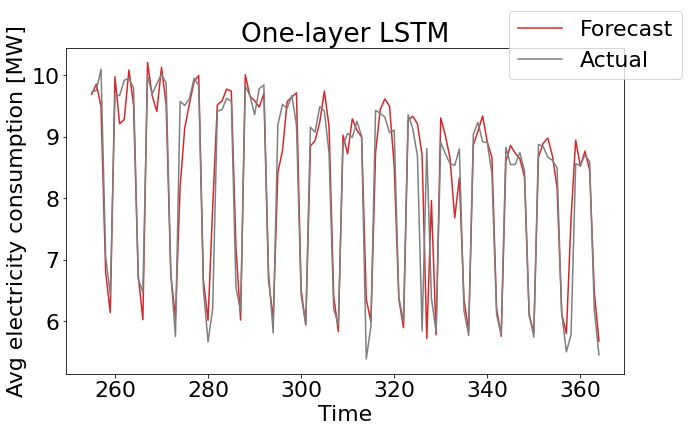

In [21]:
results = scaler.inverse_transform(results[np.newaxis]).reshape(-1,)

fig, ax1 = plt.subplots(figsize = (10,6))
ax1.plot(time_valid, results, color = "tab:red", label = "Forecast")
ax1.plot(time_valid, x_valid_true, color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("One-layer LSTM")
ax1.set_ylabel("Avg electricity consumption [MW]")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

#Calculate MAE and MAPE
print(mean_absolute_error(results,x_valid_true))
print(mean_absolute_percentage_error(results,x_valid_true))

In [22]:
# store for comparison
Onelstmresult = results

====] - 0s 14ms/step - loss: 0.0169 - mae: 0.1308
Epoch 191/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0169 - mae: 0.1318
Epoch 192/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0168 - mae: 0.1310
Epoch 193/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0168 - mae: 0.1305
Epoch 194/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0168 - mae: 0.1321
Epoch 195/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0166 - mae: 0.1302
Epoch 196/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0166 - mae: 0.1303
Epoch 197/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0166 - mae: 0.1287
Epoch 198/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0165 - mae: 0.1286
Epoch 199/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0165 - mae: 0.1282
Epoch 200/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0164 - mae: 0.1283


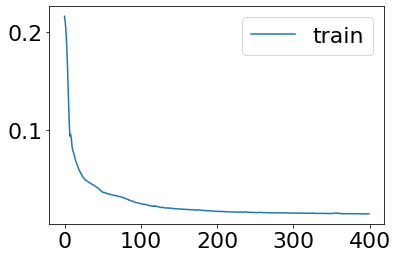

51.635491371154785


In [31]:
#two-layer LSTM
start = t.time()
tf.random.set_seed(0)
np.random.seed(0)

window_size = 7
train_set = windowed_dataset(x_train, window_size = window_size, batch_size= 100, shuffle_buffer = shuffle_buffer_size)
model = Sequential([
    
    LSTM(64, return_sequences=True), 
    LSTM(64, return_sequences=True),
    Dense(32, activation="relu"), 
    Dense(16, activation="relu"),
    Dense(1)
])

optimizer = "adam"
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=400)


# plot history
plt.plot(history.history["loss"], label="train")
plt.legend()
plt.show()

print(t.time()-start)

0.873131275177002


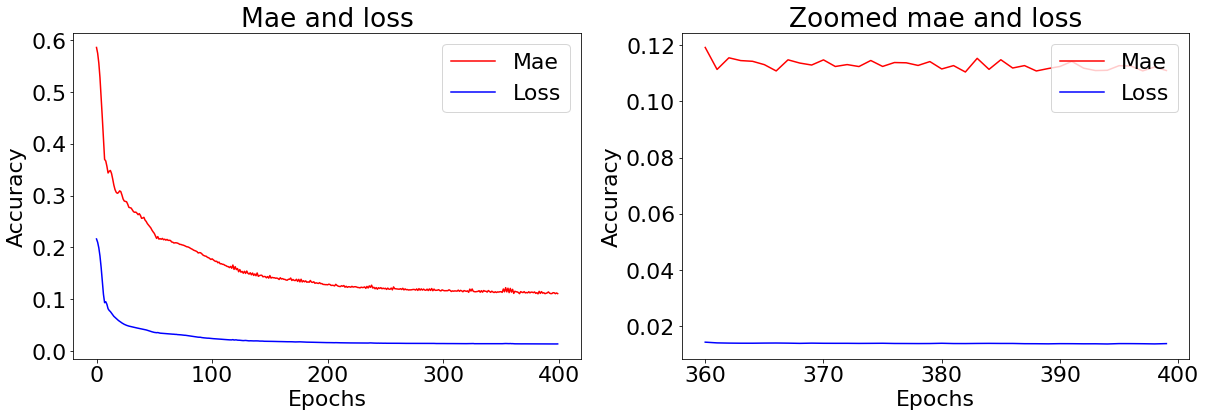

In [32]:
start = t.time()
plot_loss_mae(history)

results = model_forecast(model, series_scaled[..., np.newaxis], window_size)
results = results[time_split - window_size:-1, -1, 0]

print(t.time()-start)

0.3972323090472825
4.957066757866832


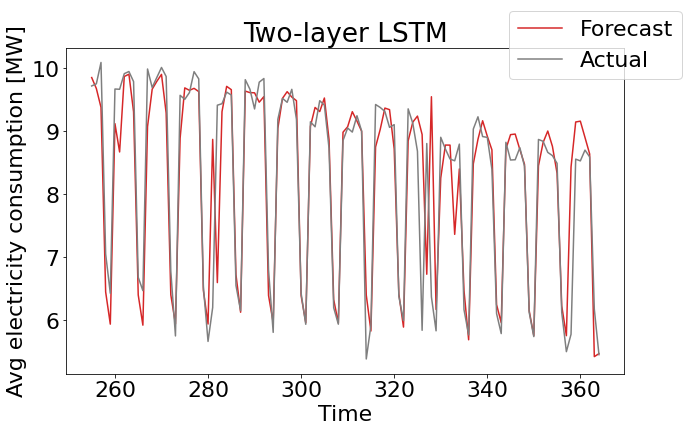

In [33]:
results = scaler.inverse_transform(results[np.newaxis]).reshape(-1,)

fig, ax1 = plt.subplots(figsize = (10,6))
ax1.plot(time_valid, results, color = "tab:red", label = "Forecast")
ax1.plot(time_valid, x_valid_true, color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("Two-layer LSTM")
ax1.set_ylabel("Avg electricity consumption [MW]")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

#Calculate MAE and MAPE
print(mean_absolute_error(results,x_valid_true))
print(mean_absolute_percentage_error(results,x_valid_true))

=======================] - 0s 6ms/step - loss: 0.0165 - mae: 0.1268
Epoch 189/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0164 - mae: 0.1268
Epoch 190/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0164 - mae: 0.1272
Epoch 191/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0164 - mae: 0.1272
Epoch 192/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0163 - mae: 0.1274
Epoch 193/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0164 - mae: 0.1259
Epoch 194/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0165 - mae: 0.1276
Epoch 195/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0164 - mae: 0.1280
Epoch 196/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0164 - mae: 0.1269
Epoch 197/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0164 - mae: 0.1282
Epoch 198/400
3/3 [==============================] - 0s 9ms/step - loss: 0.0165 - mae:

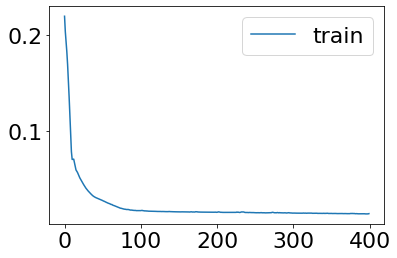

36.19006085395813


In [34]:
#CNN-LSTM-DNN
start = t.time()
window_size = 7
train_set = windowed_dataset(x_train, window_size = window_size, batch_size= 100, shuffle_buffer = shuffle_buffer_size)

model = Sequential([
  Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  LSTM(32, return_sequences=True),
  Dense(32, activation="relu"), 
  Dense(16, activation="relu"),
  Dense(1)
])

optimizer = "adam"
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=400)


# plot history
plt.plot(history.history["loss"], label="train")
plt.legend()
plt.show()

print(t.time()-start)

0.5255839824676514


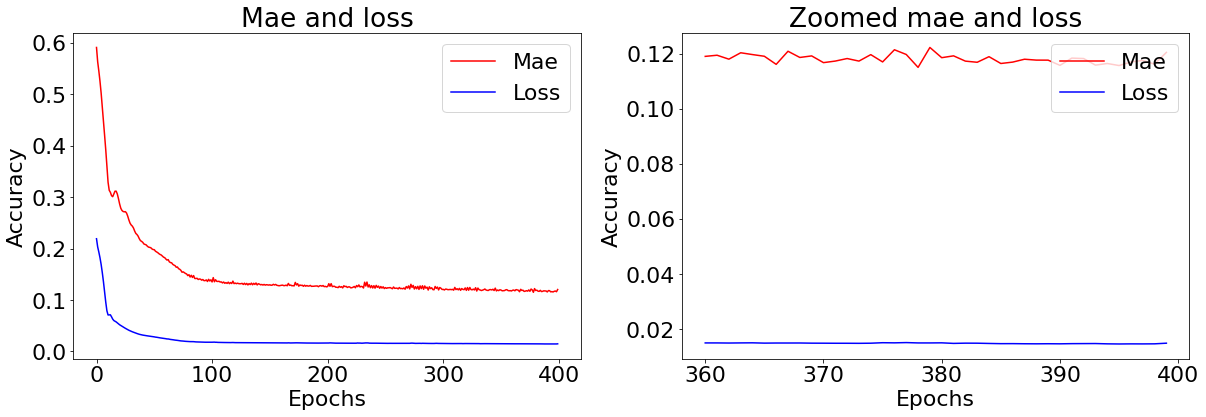

In [35]:
start = t.time()
plot_loss_mae(history)

results = model_forecast(model, series_scaled[..., np.newaxis], window_size)
results = results[time_split - window_size:-1, -1, 0]

print(t.time()-start)

0.39820466760871537
4.895278747002301


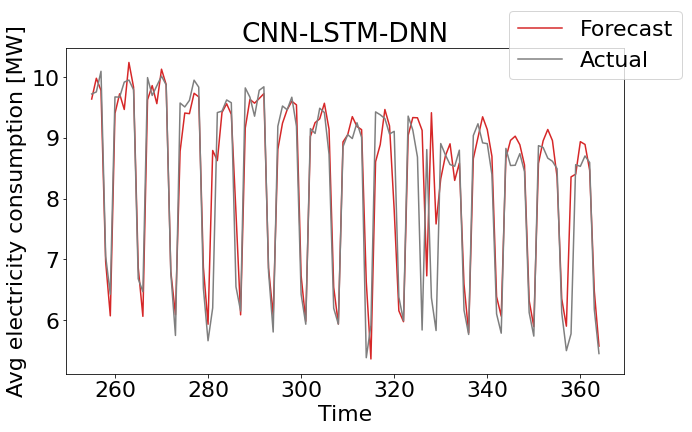

In [36]:
results = scaler.inverse_transform(results[np.newaxis]).reshape(-1,)

fig, ax1 = plt.subplots(figsize = (10,6))
ax1.plot(time_valid, results, color = "tab:red", label = "Forecast")
ax1.plot(time_valid, x_valid_true, color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("CNN-LSTM-DNN")
ax1.set_ylabel("Avg electricity consumption [MW]")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

#Calculate MAE and MAPE
print(mean_absolute_error(results,x_valid_true))
print(mean_absolute_percentage_error(results,x_valid_true))

In [38]:
Onelstmresult

array([ 9.690561 ,  9.856063 ,  9.49542  ,  6.7927966,  6.1378493,
        9.97452  ,  9.21166  ,  9.279228 , 10.084622 ,  9.5164385,
        6.747833 ,  6.0229807, 10.207461 ,  9.667146 ,  9.410351 ,
       10.127048 ,  9.529996 ,  6.7594976,  6.0451865,  8.189129 ,
        9.144629 ,  9.533034 ,  9.897593 ,  9.99654  ,  6.6702776,
        6.012308 ,  7.853605 ,  9.517074 ,  9.580472 ,  9.774162 ,
        9.740881 ,  7.192751 ,  6.0159926, 10.008855 ,  9.658908 ,
        9.585292 ,  9.482471 ,  9.699624 ,  6.6724052,  6.0367064,
        8.416239 ,  8.776542 ,  9.569837 ,  9.643363 ,  9.71403  ,
        6.512457 ,  5.939014 ,  8.84806  ,  8.936559 ,  9.232379 ,
        9.7426405,  9.170242 ,  6.4079356,  5.831163 ,  9.02455  ,
        8.721313 ,  9.291375 ,  9.1038685,  8.995204 ,  6.355504 ,
        5.9916635,  8.740025 ,  9.439844 ,  9.615029 ,  9.494632 ,
        8.526159 ,  6.3622236,  5.8922167,  9.269359 ,  9.332312 ,
        9.2105055,  8.695671 ,  5.715711 ,  7.9601307,  5.7763

In [23]:
Onelstmresult

array([ 9.690561 ,  9.856063 ,  9.49542  ,  6.7927966,  6.1378493,
        9.97452  ,  9.21166  ,  9.279228 , 10.084622 ,  9.5164385,
        6.747833 ,  6.0229807, 10.207461 ,  9.667146 ,  9.410351 ,
       10.127048 ,  9.529996 ,  6.7594976,  6.0451865,  8.189129 ,
        9.144629 ,  9.533034 ,  9.897593 ,  9.99654  ,  6.6702776,
        6.012308 ,  7.853605 ,  9.517074 ,  9.580472 ,  9.774162 ,
        9.740881 ,  7.192751 ,  6.0159926, 10.008855 ,  9.658908 ,
        9.585292 ,  9.482471 ,  9.699624 ,  6.6724052,  6.0367064,
        8.416239 ,  8.776542 ,  9.569837 ,  9.643363 ,  9.71403  ,
        6.512457 ,  5.939014 ,  8.84806  ,  8.936559 ,  9.232379 ,
        9.7426405,  9.170242 ,  6.4079356,  5.831163 ,  9.02455  ,
        8.721313 ,  9.291375 ,  9.1038685,  8.995204 ,  6.355504 ,
        5.9916635,  8.740025 ,  9.439844 ,  9.615029 ,  9.494632 ,
        8.526159 ,  6.3622236,  5.8922167,  9.269359 ,  9.332312 ,
        9.2105055,  8.695671 ,  5.715711 ,  7.9601307,  5.7763